In [1]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 6.6 MB/s eta 0:00:00


In [10]:
# Definir las variables difusas
humedad = ctrl.Antecedent(np.arange(0, 101, 1), 'humedad')
temperaturaAmbiente = ctrl.Antecedent(np.arange(0, 41, 1), 'temperaturaAmbiente')
tiempoRiego = ctrl.Consequent(np.arange(0, 31, 1), 'tiempoRiego')

In [11]:
# Definir las funciones de pertenencia
humedad['baja'] = fuzz.trimf(humedad.universe, [0, 0, 50])
humedad['media'] = fuzz.trimf(humedad.universe, [25, 50, 75])
humedad['alta'] = fuzz.trimf(humedad.universe, [50, 100, 100])
temperaturaAmbiente['baja'] = fuzz.trimf(temperaturaAmbiente.universe, [0, 0, 20])
temperaturaAmbiente['media'] = fuzz.trimf(temperaturaAmbiente.universe, [15, 25, 35])
temperaturaAmbiente['alta'] = fuzz.trimf(temperaturaAmbiente.universe, [30, 40, 40])
tiempoRiego['corto'] = fuzz.trimf(tiempoRiego.universe, [0, 0, 10])
tiempoRiego['moderado'] = fuzz.trimf(tiempoRiego.universe, [5, 15, 25])
tiempoRiego['largo'] = fuzz.trimf(tiempoRiego.universe, [20, 30, 30])

In [12]:
# Definir las reglas difusas
regla1 = ctrl.Rule(humedad['alta'], tiempoRiego['corto'])
regla2 = ctrl.Rule(humedad['baja'] & temperaturaAmbiente["alta"], tiempoRiego['largo'])
regla3 = ctrl.Rule(humedad['media'] & temperaturaAmbiente["media"], tiempoRiego['moderado'])
regla4 = ctrl.Rule(humedad['baja'] & temperaturaAmbiente["media"], tiempoRiego['moderado'])
regla5 = ctrl.Rule(humedad['media'] & temperaturaAmbiente["alta"], tiempoRiego['largo'])

In [13]:
# Crear el sistema de control
sistemaRiego = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5])
simulador = ctrl.ControlSystemSimulation(sistemaRiego)

In [14]:
# Simular el sistema con una temperatura de 28°C
humedadValor = 50
temperaturaValor = 25
simulador.input['humedad'] = humedadValor
simulador.input['temperaturaAmbiente'] = temperaturaValor
simulador.compute()

El jardín tiene una humedad de 50% y una temperatura en el ambiente de 25,
por lo tanto, el tiempo de riego es 15.00 minutos


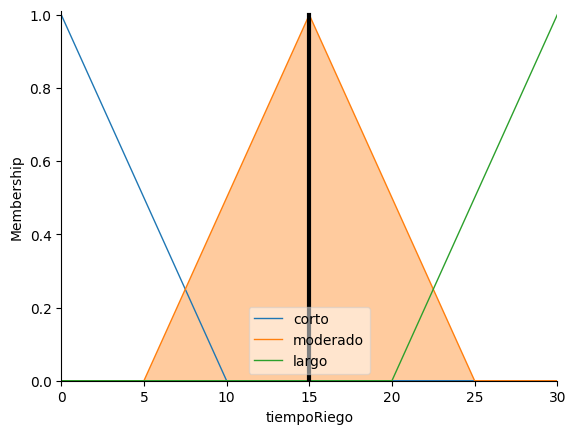

In [16]:
# Mostrar los resultados
print(f"El jardín tiene una humedad de {humedadValor}% y una temperatura en el ambiente de {temperaturaValor},\npor lo tanto, el tiempo de riego es {simulador.output['tiempoRiego']:.2f} minutos")
tiempoRiego.view(sim=simulador)